In [1]:
from src.data_processing import process_file, compute_physical, process_file_from_wizard
import matplotlib.pyplot as plt 

file_path = "data/Test_XH430W350_20240209/Test_3_Rotor_Bloque.csv"
file_path2 = "data/Test_XH430W350_20240209/Rotor_bloqué.csv"
file_path3 = "data/Test_XH430W350_20240209/Test2_rotor_bloqué.csv"
df = process_file_from_wizard(file_path)
df2 = process_file_from_wizard(file_path2)
df3 = process_file_from_wizard(file_path3)

df['DXL_Position'] = df['DXL_Position'] - df['DXL_Position'][0]
df = df[:].reset_index(drop=True)
df

,Time[ms],Realtime Tick,Present Position,Present PWM,Present Current,Present Velocity,DXL_Current,DXL_PWM,DXL_Input_Voltage,U,DXL_Velocity,DXL_Position,t,delta_t
0,0,21955,107997,0,-1,0,-0.00269,0.0,12,0.0,0.0,0.000000,0.000,0.000
1,86,22041,107997,0,-1,0,-0.00269,0.0,12,0.0,0.0,0.000000,0.086,0.086
2,89,22044,107997,0,-1,0,-0.00269,0.0,12,0.0,0.0,0.000000,0.089,0.003
3,90,22045,107997,0,-1,0,-0.00269,0.0,12,0.0,0.0,0.000000,0.090,0.001
4,93,22048,107997,0,-1,0,-0.00269,0.0,12,0.0,0.0,0.000000,0.093,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,28525,17713,107950,0,-1,0,-0.00269,0.0,12,0.0,0.0,-0.072187,28.525,0.003
11558,28528,17716,107951,0,-1,0,-0.00269,0.0,12,0.0,0.0,-0.070651,28.528,0.003
11559,28531,17719,107950,0,-1,0,-0.00269,0.0,12,0.0,0.0,-0.072187,28.531,0.003
11560,28534,17722,107950,0,-1,0,-0.00269,0.0,12,0.0,0.0,-0.072187,28.534,0.003


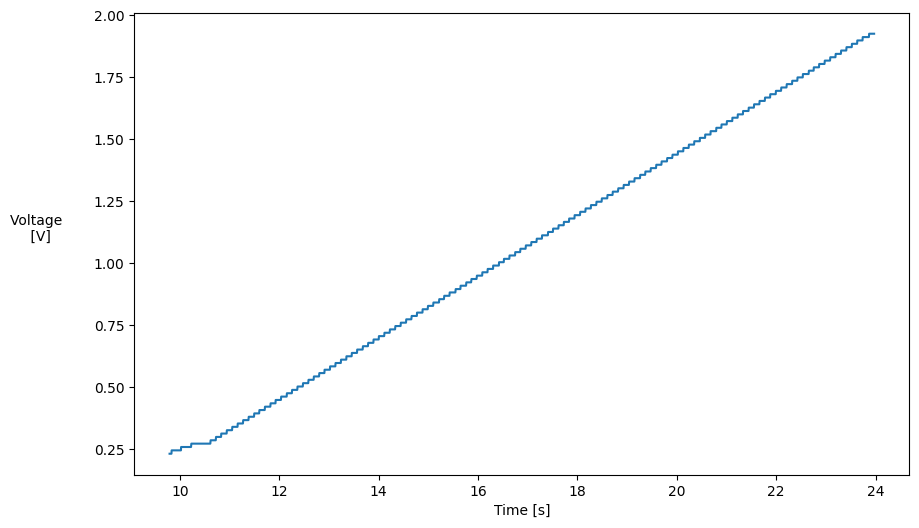

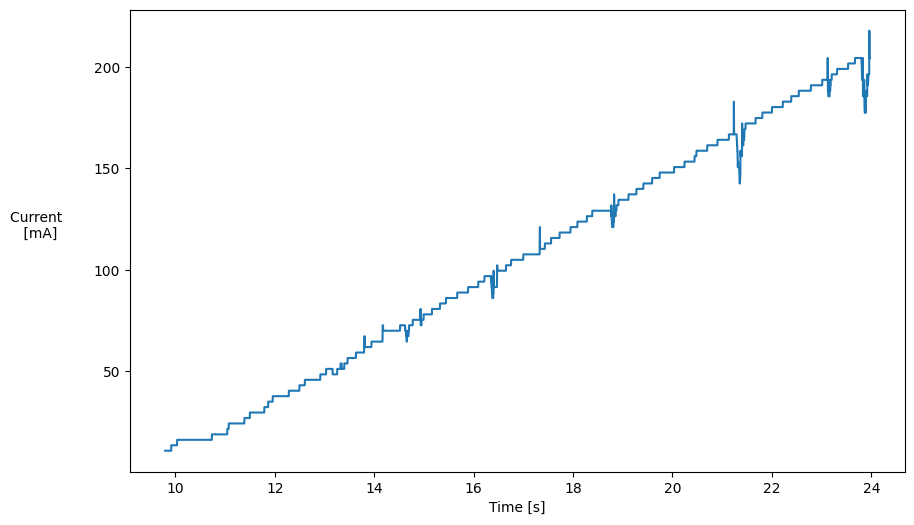

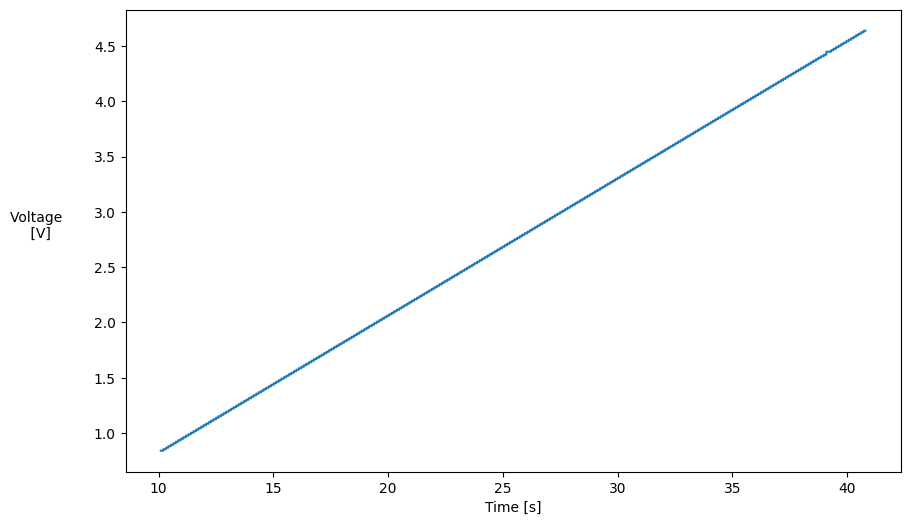

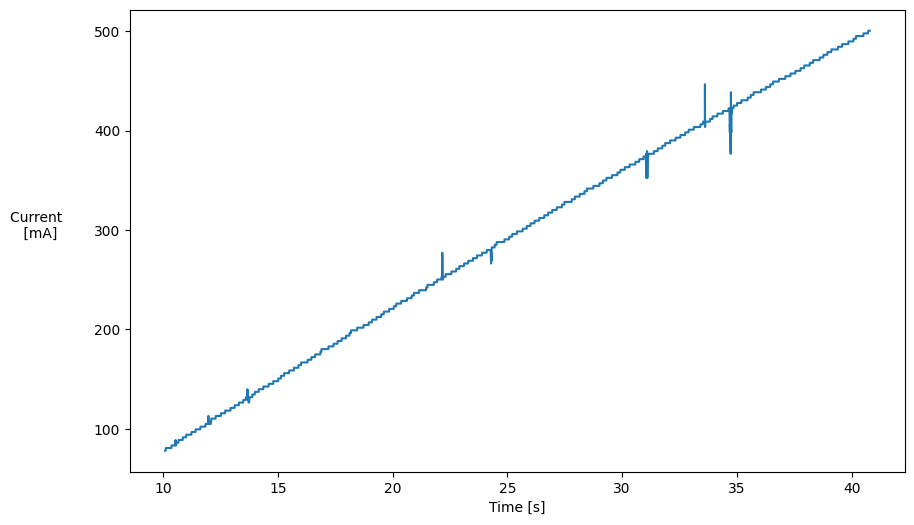

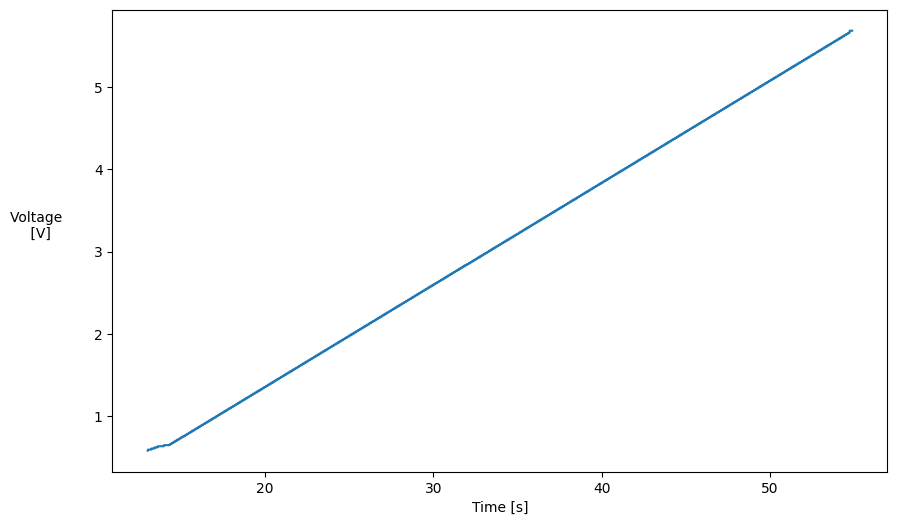

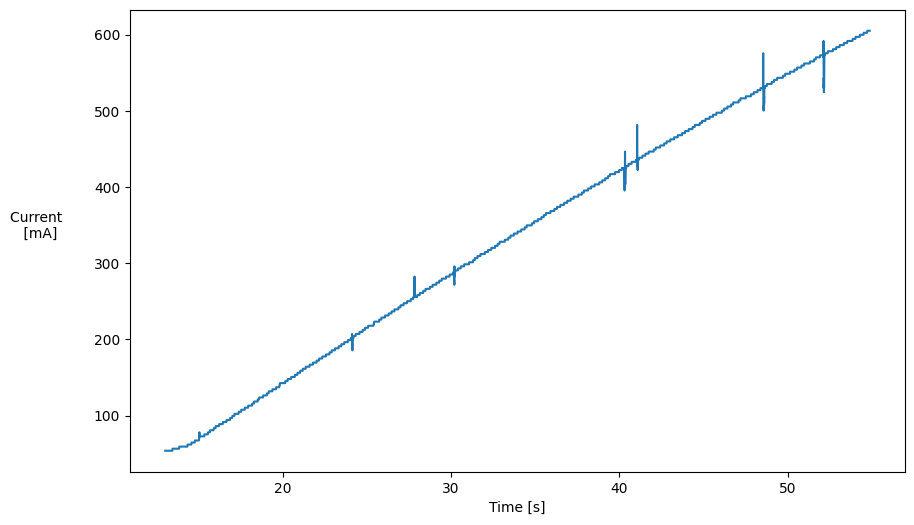

In [2]:
from src.data_processing import split_data
from src.plotting import plot_data_q, plot_measured_U, plot_tau_o, plot_tau_f,plot_tau_I,plot_tau_U, plot_accelerations, plot_measured_q, plot_data_q_dot, plot_measured_I

# liste = split_data(df)
plot_measured_U(df[4000:9700])
plot_measured_I(df[4000:9700])
df = df[4000:9700]
df = df[:].reset_index(drop=True)

plot_measured_U(df2[:12500])
plot_measured_I(df2[:12500])
df2 = df2[:12500]
df2 = df2[:].reset_index(drop=True)

plot_measured_U(df3[5000:22000])
plot_measured_I(df3[5000:22000])
df3 = df3[5000:22000]
df3 = df3[:].reset_index(drop=True)


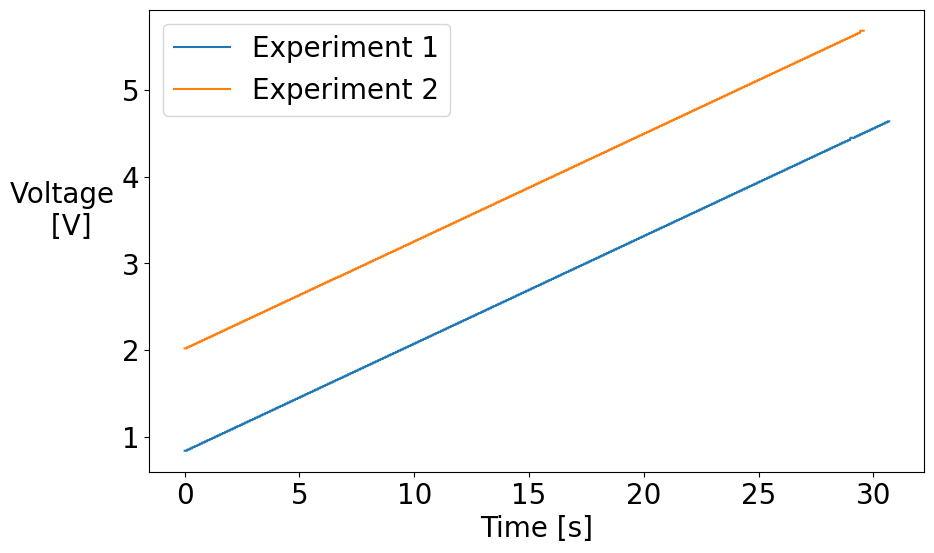

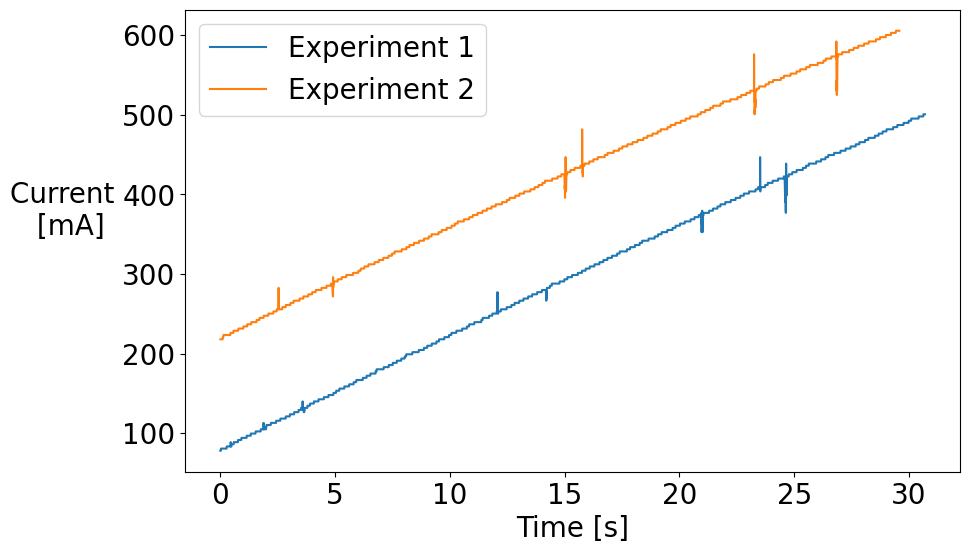

In [3]:
from src.data_processing import split_data
from src.plotting import plot_data_q, plot_measured_U, plot_tau_o, plot_tau_f,plot_tau_I,plot_tau_U, plot_accelerations, plot_measured_q, plot_data_q_dot, plot_measured_I
import matplotlib as mpl

# Set the font size globally
mpl.rcParams.update({'font.size': 20})  # Change 14 to your desired font size
df2toplot = df2[:12500].reset_index(drop=True)
df2toplot['t'] -= df2toplot['t'][0]

df3toplot = df3[5000:22000].reset_index(drop=True)
df3toplot['t'] -= df3toplot['t'][0]

plot_measured_U(df2toplot, df3toplot)
plot_measured_I(df2toplot, df3toplot)

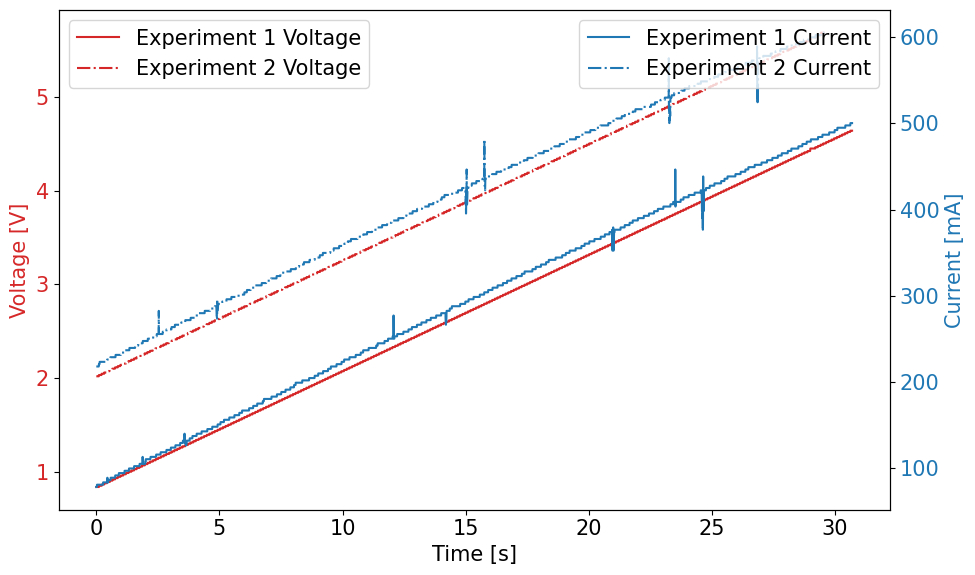

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_combined_graph(df_slow, df_fast=None, label1='Experiment 1', label2='Experiment 2'):
    # Create a figure and a single set of axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the voltage data on the primary y-axis
    color = 'tab:red'
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage [V]', color=color)
    ax1.plot(df_slow['t'], df_slow['U'], label=f"{label1} Voltage", color=color)
    if df_fast is not None:
        ax1.plot(df_fast['t'], df_fast['U'], label=f"{label2} Voltage", color=color, linestyle='dashdot')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for the current data
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Current [mA]', color=color)  # we already handled the x-label with ax1
    ax2.plot(df_slow['t'], df_slow['DXL_Current'] * 1000, label=f"{label1} Current", color=color)
    if df_fast is not None:
        ax2.plot(df_fast['t'], df_fast['DXL_Current'] * 1000, label=f"{label2} Current", color=color, linestyle='dashdot')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Optionally, add a title
    # plt.title('Measured Voltage and Current')

    fig.tight_layout()  # to ensure the right y-label is not slightly cut off
    plt.show()

# Set the font size globally
mpl.rcParams.update({'font.size': 15})  # Change 14 to your desired font size

# Assuming df2toplot and df3toplot are defined and formatted as in the original code

plot_combined_graph(df2toplot, df3toplot)


9.381140617931974
9.370030722229181
9.375585670080579


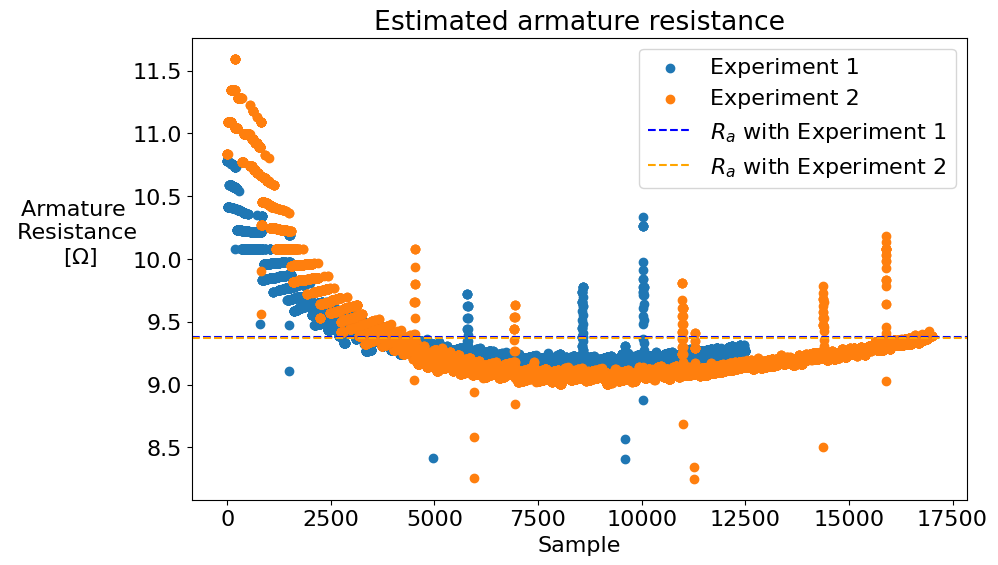

In [7]:
import matplotlib as mpl

# Set the font size globally
mpl.rcParams.update({'font.size': 16})  # Change 14 to your desired font size

df['Ra'] = df['U'] / df['DXL_Current']
df2['Ra'] = df2['U'] / df2['DXL_Current']
df3['Ra'] = df3['U'] / df3['DXL_Current']

mean_Ra = df['Ra'].mean()
mean_Ra2 = df2['Ra'].mean()
mean_Ra3 = df3['Ra'].mean()
print(mean_Ra2)
print(mean_Ra3)
print((mean_Ra2 + mean_Ra3) / 2)
plt.figure(figsize=(10, 6))
# plt.plot(df['Ra'])
plt.scatter(df2.index, df2['Ra'], label='Experiment 1')
plt.scatter(df3.index, df3['Ra'], label='Experiment 2')
# plt.axhline(y=mean_Ra, color='g', linestyle='--', label=r'$\tau_s$')
plt.axhline(y=mean_Ra2, color='b', linestyle='--', label=r'$R_a$ with Experiment 1')
plt.axhline(y=mean_Ra3, color='orange', linestyle='--', label=r'$R_a$ with Experiment 2')
plt.xlabel('Sample')
text = r'[$\Omega$]'
plt.ylabel(f'Armature \n Resistance \n {text}', rotation=0, labelpad=40)
plt.title(f'Estimated armature resistance')
plt.legend()
plt.show()

# Note : présenter aussi les mesures de tension/courant pour expliquer la distortion (sinon on peut se demander quid pourquoi on a ça)
# Valeur identifiée finale : 9.3756 [Ohm]